In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
input_img = Input(shape = (32, 32, 3))


encoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(input_img)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)

decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)

decoded = Conv2D(3, (3, 3), activation = 'sigmoid', padding = 'same')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [16]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 97s 2ms/step - loss: 0.6365 - accuracy: 0.0098 - val_loss: 0.6086 - val_accuracy: 0.0118
Epoch 2/50
50000/50000 [==============================] - 82s 2ms/step - loss: 0.6020 - accuracy: 0.0118 - val_loss: 0.5985 - val_accuracy: 0.0119
Epoch 3/50
50000/50000 [==============================] - 82s 2ms/step - loss: 0.5955 - accuracy: 0.0119 - val_loss: 0.5943 - val_accuracy: 0.0120
Epoch 4/50
50000/50000 [==============================] - 82s 2ms/step - loss: 0.5928 - accuracy: 0.0119 - val_loss: 0.5965 - val_accuracy: 0.0120
Epoch 5/50
50000/50000 [==============================] - 82s 2ms/step - loss: 0.5912 - accuracy: 0.0119 - val_loss: 0.5915 - val_accuracy: 0.0120
Epoch 6/50
50000/50000 [==============================] - 82s 2ms/step - loss: 0.5899 - accuracy: 0.0119 - val_loss: 0.5902 - val_accuracy: 0.0120
Epoch 7/50
50000/50000 [==============================] - 82s 2ms/st

In [17]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [18]:
encoded_test_data.shape

(10000, 4, 4, 8)

In [19]:
encoded_test_data = encoded_test_data.reshape(len(encoded_test_data), np.prod(encoded_test_data.shape[1:]))

In [20]:
encoded_test_data.shape

(10000, 128)

In [21]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [22]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 130)

In [23]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Convolutional_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Convolutional_Encoded_Test_RSAB.csv', index = False)

In [24]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : dog


In [25]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 5


In [26]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [27]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [28]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,120,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance
39,5,dog,2.382606,1.784982,1.185012,0.000000,1.494251,0.886070,2.108913,1.329783,...,1.832516,2.295978,2.025373,1.003138,2.508198,3.693679,1.538881,2.404269,1.000000,0.000000
432,3,cat,1.831363,1.634291,1.085680,0.000000,1.352543,1.499816,1.649180,1.530312,...,1.792128,1.763659,1.725131,1.820224,2.096953,2.908866,1.740444,2.417376,0.979013,0.020987
5850,6,frog,2.061147,1.675348,0.744610,0.000000,1.080861,1.428613,1.519166,1.506693,...,1.690235,1.759091,1.388679,1.664712,1.772143,2.603862,1.170150,1.842833,0.978954,0.021046
5377,5,dog,2.516607,1.847670,1.249732,0.206515,1.157556,0.480416,2.311464,1.201774,...,1.803878,2.327665,2.523160,1.788758,2.216475,2.610617,1.771101,2.067973,0.978768,0.021232
3956,3,cat,2.558020,2.144721,0.940941,0.237536,1.147658,0.645534,2.213346,1.130844,...,2.020285,1.422091,1.391942,1.276182,2.023290,2.739161,1.198175,2.243062,0.978738,0.021262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,4,deer,2.543058,3.034819,1.062613,1.886724,0.687527,0.000000,2.943013,0.000000,...,2.448298,2.904446,2.431557,3.349819,1.783025,1.097287,2.649828,1.442618,0.818107,0.181893
9765,4,deer,2.530421,3.041003,1.058736,1.898130,0.672363,0.000000,2.943514,0.000000,...,2.750940,2.782242,2.049478,2.815552,2.066168,1.797522,2.499000,1.648894,0.817523,0.182477
5263,8,ship,0.325883,0.075030,0.714728,0.000000,2.052827,3.993124,0.036379,3.471761,...,3.128952,3.263037,2.123693,2.176032,3.171407,2.221729,2.679164,2.099769,0.817297,0.182703
3444,0,airplane,0.357718,0.089336,0.703577,0.000000,2.047428,4.004621,0.011712,3.446677,...,1.600559,0.218897,0.808440,0.101086,2.723161,3.459382,0.419825,2.909419,0.816598,0.183402


In [29]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

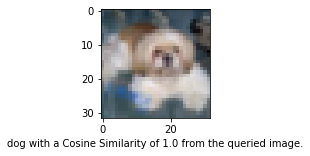

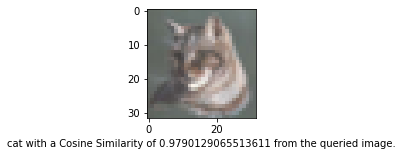

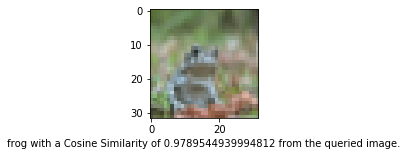

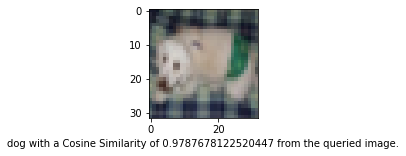

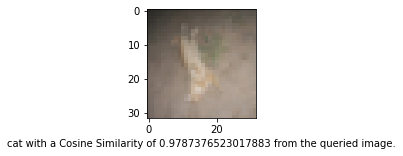

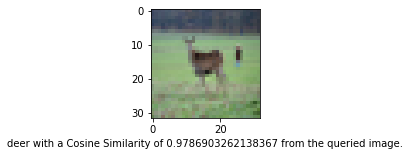

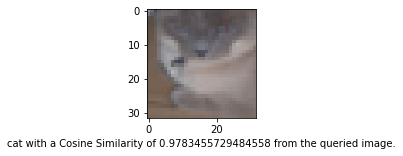

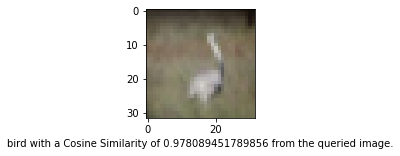

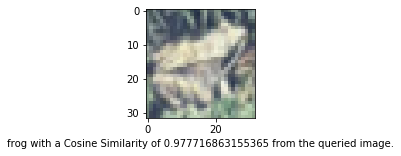

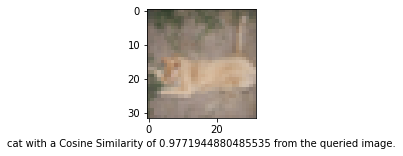

In [30]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [31]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [32]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance,Euclidean Distance
39,5,dog,2.382606,1.784982,1.185012,0.000000,1.494251,0.886070,2.108913,1.329783,...,2.295978,2.025373,1.003138,2.508198,3.693679,1.538881,2.404269,1.000000,0.000000,0.000000
5377,5,dog,2.516607,1.847670,1.249732,0.206515,1.157556,0.480416,2.311464,1.201774,...,2.327665,2.523160,1.788758,2.216475,2.610617,1.771101,2.067973,0.978768,0.021232,5.026016
7667,6,frog,1.754581,1.303807,1.102054,0.000000,1.470792,1.089743,1.927843,1.711494,...,1.490196,1.704182,1.480741,2.422014,2.671359,1.339538,2.237586,0.977717,0.022283,5.108320
6888,4,deer,2.072735,1.760827,1.374231,0.000000,1.556642,0.995154,2.026825,1.302640,...,1.650964,1.430311,1.699327,2.072960,2.519578,1.526977,1.848870,0.978690,0.021310,5.201993
6280,8,ship,1.978571,2.284570,1.257286,0.028902,0.942112,0.853430,2.122790,0.995145,...,1.583807,1.744325,2.161471,2.022890,2.222761,2.042866,2.210153,0.975780,0.024220,5.304517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,2,bird,0.318991,0.074682,0.690115,0.000000,2.035363,4.018249,0.008816,3.477047,...,2.380357,2.400049,3.317264,3.130814,1.631291,2.754287,1.934540,0.847635,0.152365,15.285489
9246,3,cat,2.585530,2.939103,1.045098,1.872883,0.761573,0.000000,2.947077,0.000000,...,3.540643,2.513856,3.516645,1.674065,3.269023,3.177504,1.405564,0.815913,0.184087,15.354363
6675,2,bird,0.309615,0.086350,0.703197,0.000000,2.022758,4.002507,0.023779,3.472934,...,1.837588,1.240677,0.639859,3.952198,4.772568,0.820035,3.380073,0.848041,0.151959,15.422114
6234,7,horse,2.526850,3.030902,1.075323,1.884395,0.690974,0.000000,2.944667,0.000000,...,3.425441,2.964941,3.419310,1.553760,0.624112,2.836468,0.213527,0.828507,0.171493,15.616857


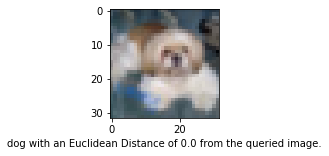

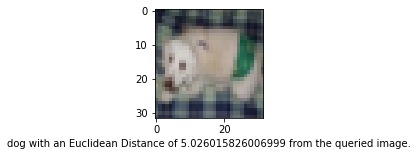

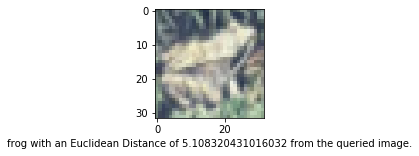

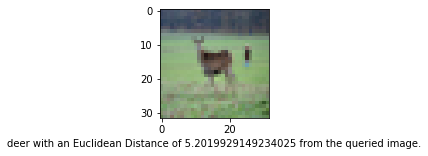

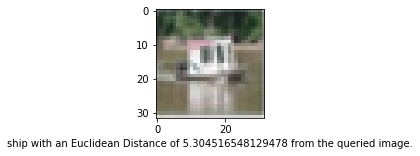

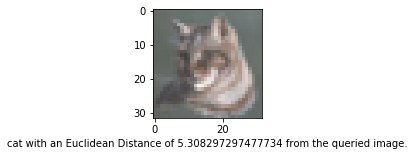

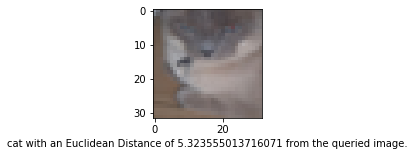

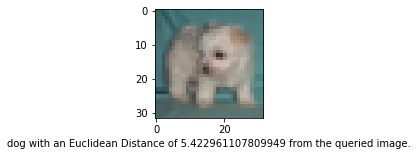

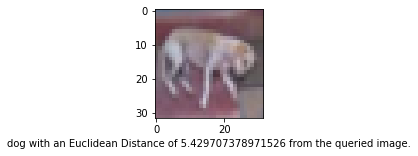

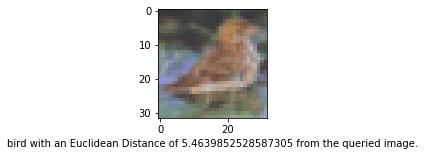

In [33]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()